##### PAIR PROGRAMMING - REGRESIÓN LINEAL 6 - ESTANDARIZACIÓN 

In [8]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

In [9]:
df = pd.read_csv('../datos/pokePd_normalizado.csv', index_col = 0)
df.head()

,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Speed_BOX
0,Grass,318,45,49,49,65,65,45,16.160251
1,Poison,318,45,49,49,65,65,45,16.160251
2,Grass,405,60,62,63,80,80,60,19.724770
3,Poison,405,60,62,63,80,80,60,19.724770
4,Grass,525,80,82,83,100,100,80,24.005888


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

1. Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.

In [10]:
# seleccionamos las variables numéricas de nuestro dataset

numericas = df.select_dtypes(include= np.number)

In [11]:
# eliminamos las columnas de la variable respuesta

numericas.drop(['Speed', 'Speed_BOX'], axis=1, inplace=True)

In [12]:
numericas.head()

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def
0,318,45,49,49,65,65
1,318,45,49,49,65,65
2,405,60,62,63,80,80
3,405,60,62,63,80,80
4,525,80,82,83,100,100


In [13]:
# construimos el modelo de escalador con el método RobustScaler: este método transforma nuestra variable restando la mediana y dividiéndola por el rango intercuartílico
# Trabajamos con él porque previamente no habíamos tratado los outliers 

robust = RobustScaler()

In [14]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(numericas)

RobustScaler()

In [15]:
# transformamos los datos
X_robust = robust.transform(numericas)

In [16]:
numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)

numericas_robust.head(2)

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def
0,-0.819945,-0.75,-0.738095,-0.5,-0.088889,-0.131579
1,-0.819945,-0.75,-0.738095,-0.5,-0.088889,-0.131579


In [17]:
# mediante el for loop  iteramos por todas las columnas para que nos devuelva la media y la desviación típica
# vemos que los valores de la media son más cercanos a 0 y los de la std a 1

for columna in numericas_robust.columns:
    
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')

    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')

    print("-------------------------------------------------------------")

La media de la columna Total es:  -0.10963568147550819
La desviación estándar de la columna Total es: 0.6785829398087171
-------------------------------------------------------------
La media de la columna HP es:  0.04774525316455696
La desviación estándar de la columna HP es: 0.8195635254247908
-------------------------------------------------------------
La media de la columna Attack es:  0.04172694394213386
La desviación estándar de la columna Attack es: 0.7789677426684343
-------------------------------------------------------------
La media de la columna Defense es:  0.15742917420132604
La desviación estándar de la columna Defense es: 0.7596006136597215
-------------------------------------------------------------
La media de la columna Sp.Atk es:  0.12033755274261608
La desviación estándar de la columna Sp.Atk es: 0.7341318178203832
-------------------------------------------------------------
La media de la columna Sp.Def es:  0.09125582944703549
La desviación estándar de la col

In [18]:
# con el describe lo vemos de manera más visual

numericas_robust.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,1580.0,-0.109636,0.678583,-1.612188,-0.700831,0.0,0.299169,3.650970
HP,1580.0,0.047745,0.819564,-2.125000,-0.500000,0.0,0.500000,5.812500
Attack,1580.0,0.041727,0.778968,-1.785714,-0.523810,0.0,0.476190,2.619048
Defense,1580.0,0.157429,0.759601,-1.547619,-0.404762,0.0,0.595238,4.285714
Sp.Atk,1580.0,0.120338,0.734132,-1.311111,-0.422222,0.0,0.577778,2.777778
Sp.Def,1580.0,0.091256,0.741577,-1.315789,-0.473684,0.0,0.526316,4.736842


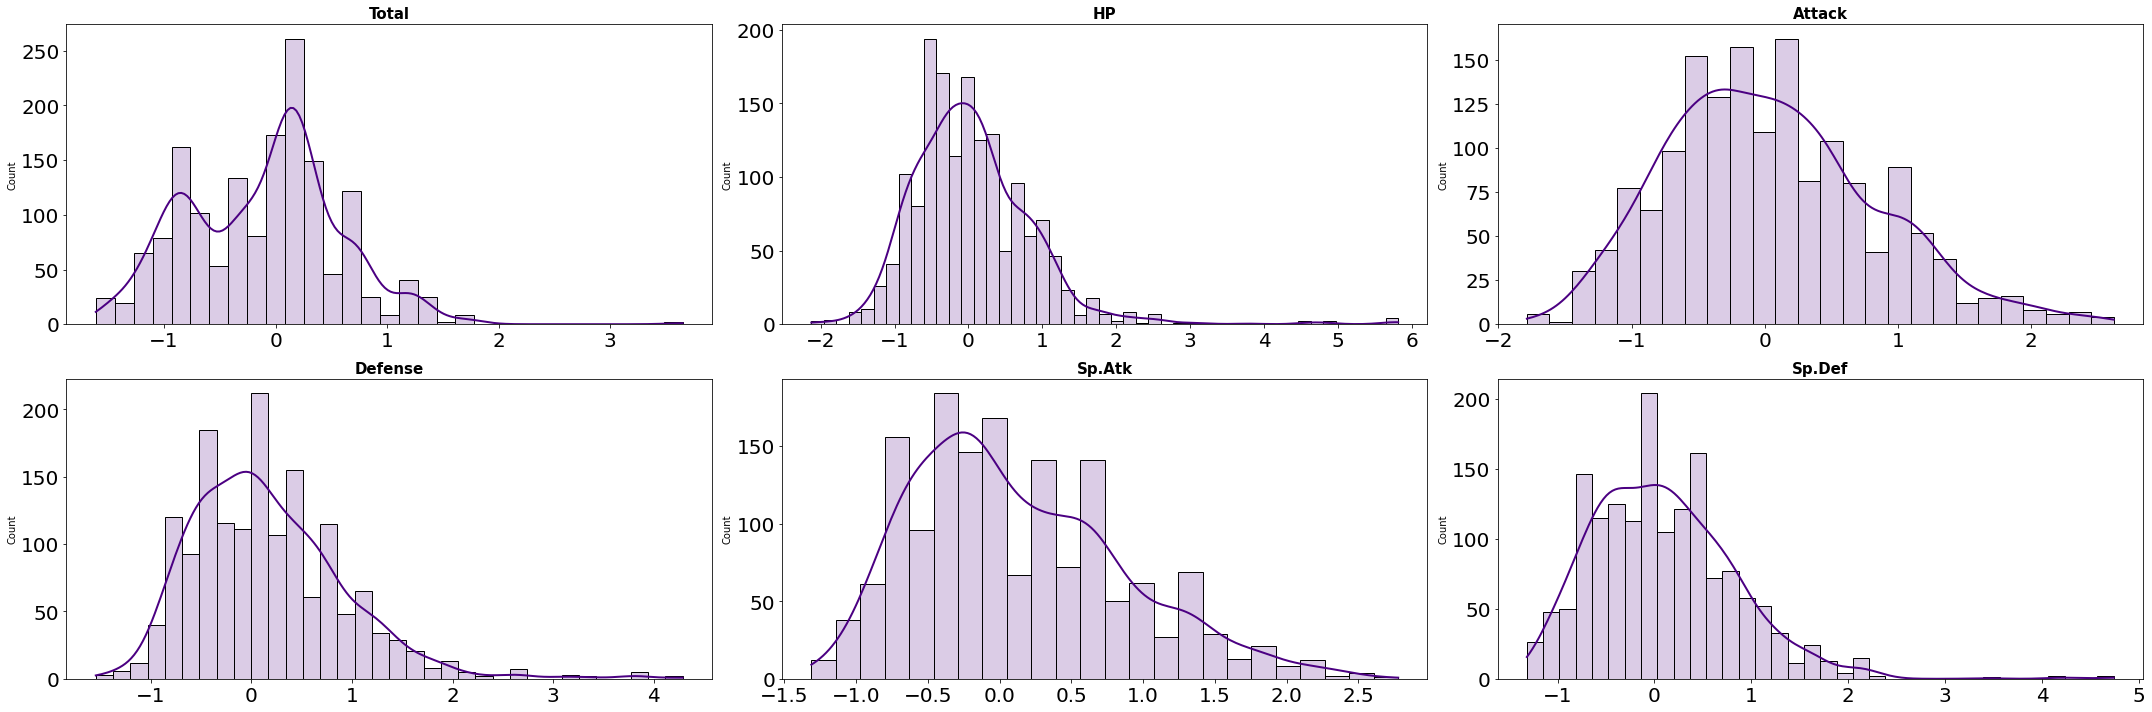

In [19]:
#Obtenemos el hisplot para obtener apoyo visual de la transformación realizada previamente 

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

columnas_robust = numericas_robust.columns
axes = axes.flat
for i, colum in enumerate(columnas_robust): 
    sns.histplot(data = numericas_robust,
                 x = colum,
                 kde = True,
                 color= 'indigo',
                 line_kws = {"linewidth": 2},
                 alpha = 0.2,
                 ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    fig.tight_layout()
    
    # fig.delaxes(axes[-1])
    # fig.delaxes(axes[-2])
    # fig.delaxes(axes[-3])

Hemos decidido aplicar esta estandarización porque tenemos outliers en nuestras variables que no se han tratado previamente. Con el método RobustScaler transformamos nuestras variables restando la mediana y dividiéndola por el rango intercuartílico. El rango de cada variable después de aplicar el método será mayor que el del MinMaxScaler.
Con el StandardScaler tambíen conseguimos la estandarización de todas nuestras variables predictoras pero en este caso no se tienen en cuenta los valores atípicos.

In [20]:
numericas_robust.head()

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def
0,-0.819945,-0.75000,-0.738095,-0.500000,-0.088889,-0.131579
1,-0.819945,-0.75000,-0.738095,-0.500000,-0.088889,-0.131579
2,-0.337950,-0.28125,-0.428571,-0.166667,0.244444,0.263158
3,-0.337950,-0.28125,-0.428571,-0.166667,0.244444,0.263158
4,0.326870,0.34375,0.047619,0.309524,0.688889,0.789474


In [21]:
df[numericas_robust.columns] = numericas_robust

In [22]:
df.drop('Speed', axis=1, inplace=True)

In [23]:
df.head(2)

,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed_BOX
0,Grass,-0.819945,-0.75,-0.738095,-0.5,-0.088889,-0.131579,16.160251
1,Poison,-0.819945,-0.75,-0.738095,-0.5,-0.088889,-0.131579,16.160251


2. Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [25]:
df.to_csv('../datos/pokePd_estandarizado.csv')